In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
from matplotlib.transforms import Bbox
from matplotlib.lines import Line2D
import xarray as xr
import seaborn as sns
from glob import glob
import pandas as pd
# import warnings
# warnings.filterwarnings('ignore')

In [2]:
pwd = "/glade/work/noteng/masters-research/data/temp_diff/"

In [3]:
data_path = glob(f"{pwd}*nc")
data_path[:10]

['/glade/work/noteng/masters-research/data/temp_diff/anxtemp_diffM1.20200306.000000.nc',
 '/glade/work/noteng/masters-research/data/temp_diff/anxtemp_diffM1.20200224.000000.nc',
 '/glade/work/noteng/masters-research/data/temp_diff/anxtemp_diffM1.20200124.000000.nc',
 '/glade/work/noteng/masters-research/data/temp_diff/anxtemp_diffM1.20200308.000000.nc',
 '/glade/work/noteng/masters-research/data/temp_diff/anxtemp_diffM1.20200406.000000.nc',
 '/glade/work/noteng/masters-research/data/temp_diff/anxtemp_diffM1.20200517.000000.nc',
 '/glade/work/noteng/masters-research/data/temp_diff/anxtemp_diffM1.20200209.000000.nc',
 '/glade/work/noteng/masters-research/data/temp_diff/anxtemp_diffM1.20200222.000000.nc',
 '/glade/work/noteng/masters-research/data/temp_diff/anxtemp_diffM1.20200423.000000.nc',
 '/glade/work/noteng/masters-research/data/temp_diff/anxtemp_diffM1.20191210.000000.nc']

In [4]:
selected_data_paths = [path for path in data_path if "202003" in path]
selected_data_paths

['/glade/work/noteng/masters-research/data/temp_diff/anxtemp_diffM1.20200306.000000.nc',
 '/glade/work/noteng/masters-research/data/temp_diff/anxtemp_diffM1.20200308.000000.nc',
 '/glade/work/noteng/masters-research/data/temp_diff/anxtemp_diffM1.20200324.000000.nc',
 '/glade/work/noteng/masters-research/data/temp_diff/anxtemp_diffM1.20200322.000000.nc',
 '/glade/work/noteng/masters-research/data/temp_diff/anxtemp_diffM1.20200331.000000.nc',
 '/glade/work/noteng/masters-research/data/temp_diff/anxtemp_diffM1.20200328.000000.nc',
 '/glade/work/noteng/masters-research/data/temp_diff/anxtemp_diffM1.20200309.000000.nc',
 '/glade/work/noteng/masters-research/data/temp_diff/anxtemp_diffM1.20200312.000000.nc',
 '/glade/work/noteng/masters-research/data/temp_diff/anxtemp_diffM1.20200303.000000.nc',
 '/glade/work/noteng/masters-research/data/temp_diff/anxtemp_diffM1.20200317.000000.nc',
 '/glade/work/noteng/masters-research/data/temp_diff/anxtemp_diffM1.20200327.000000.nc',
 '/glade/work/noteng/

In [5]:
# selecting March 13th, March 14th case
selected_data_paths1 = [path for path in data_path if "20200313" in path or "20200314" in path]
selected_data_paths1

['/glade/work/noteng/masters-research/data/temp_diff/anxtemp_diffM1.20200313.000000.nc',
 '/glade/work/noteng/masters-research/data/temp_diff/anxtemp_diffM1.20200314.000000.nc']

In [6]:
march13 = xr.open_dataset(selected_data_paths1[0])
march13

<xarray.Dataset>
Dimensions:    (time: 1440)
Dimensions without coordinates: time
Data variables:
    temp_diff  (time) float32 ...

In [7]:
# Assuming your dataset has a time dimension with 1440 time steps
# We'll select data from index 240 (4:00 AM) to the end of the day (index 1439)

slice_mar13 = march13.isel(time=slice(240, 1440))
slice_mar13

<xarray.Dataset>
Dimensions:    (time: 1200)
Dimensions without coordinates: time
Data variables:
    temp_diff  (time) float32 -0.2134 -0.01885 0.1846 ... -0.853 -0.8429 -0.8415

In [8]:
march14 = xr.open_dataset(selected_data_paths1[1])
march14

<xarray.Dataset>
Dimensions:    (time: 1440)
Dimensions without coordinates: time
Data variables:
    temp_diff  (time) float32 ...

In [9]:
combined_data = xr.concat([march13, march14], dim='time')
combined_data

<xarray.Dataset>
Dimensions:    (time: 2880)
Dimensions without coordinates: time
Data variables:
    temp_diff  (time) float32 0.1883 0.06594 0.08 ... -0.7359 -0.5705 -0.5789

In [10]:
len(combined_data['temp_diff'])

2880

In [11]:
# Create a time coordinate in the desired format
start_time = pd.Timestamp("2020-03-13")
time_values = [start_time + pd.Timedelta(minutes=i) for i in range(2880)]

# Convert the list of Timestamp objects to a list of strings in the desired format
time_strings = [t.strftime('%Y-%m-%dT%H:%M:%S.%f') for t in time_values]

# Assign the time coordinate to the dataset
combined_data['time'] = pd.to_datetime(time_strings)

# Print the updated dataset
# len(time_strings)

In [12]:
combined_data

<xarray.Dataset>
Dimensions:    (time: 2880)
Coordinates:
  * time       (time) datetime64[ns] 2020-03-13 ... 2020-03-14T23:59:00
Data variables:
    temp_diff  (time) float32 0.1883 0.06594 0.08 ... -0.7359 -0.5705 -0.5789

In [13]:
# Assuming your dataset has a time dimension with 2880 time steps, one minute time resolution
# We'll select data from index 240 (4:00 AM on March 13th) to index 1380 (5:00 AM on March 14th).
# combine_ds = combined_data.isel(time=slice(240, 1380))
combine_ds = combined_data.sel(time=slice('2020-03-13T04:00:00.000000000', '2020-03-14T05:20:00.000000000'))

combine_ds

<xarray.Dataset>
Dimensions:    (time: 1521)
Coordinates:
  * time       (time) datetime64[ns] 2020-03-13T04:00:00 ... 2020-03-14T05:20:00
Data variables:
    temp_diff  (time) float32 -0.2134 -0.01885 0.1846 ... 0.4164 0.4201 0.438

In [14]:
temp = combine_ds['temp_diff']
temp

<xarray.DataArray 'temp_diff' (time: 1521)>
array([-0.21335407, -0.018853  ,  0.1845671 , ...,  0.41641465,
        0.42013407,  0.43795285], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2020-03-13T04:00:00 ... 2020-03-14T05:20:00

In [15]:
# open dataset
data_path = '/glade/work/noteng/masters-research/comble/CFADS/'
dataset = xr.open_dataset(f'{data_path}kazar-data-concat-mar13-mar14.nc')

# # get reflectivity, doppler velocity and spectral width variables
# reflectivity = dataset['reflectivity_best_estimate'] #dBZ
# spectral_width = dataset['spectral_width'] #m/s
# doppler_velocity = dataset['mean_doppler_velocity'] #m/s
lwp = dataset['mwr_lwp'] #g/m^2
precip_rate = dataset['precip_mean'] #mm/hr
height = dataset['height']

In [16]:
# fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))
# ax = ax.flatten()

# # Define datasets for the example
# datasets = [slice_mar13['temp_diff'], combine_ds['temp_diff']]

# colors = ['crimson', 'royalblue']
# title = ['march13', 'march 13 and 14']
# # y_label = ['T-anomaly', 'T-anomaly']

# # Plot the horizontal violin plots with inner boxplots
# for i, (data, color) in enumerate(zip(datasets, colors)):
    
#     sns.violinplot(x=data, ax=ax[i], color=color, linewidth=4, inner="box", orient='h', bw=0.3, saturation=1)
        
    
#     # Overlay median (box shape) and mean (star shape)
#     median = np.median(data)
#     mean = np.mean(data)
#     ax[i].scatter(median, 0, marker='D', color='white', s=30, zorder=3) # Box shape for median
#     ax[i].scatter(mean, 0, marker='*', color='red', s=30, zorder=3) # Star shape for mean
#     ax[i].grid(color='gray', alpha=0.1)
#     ax[i].set_title(title[i])

In [17]:
# fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))
# ax = ax.flatten()

# # Define datasets for the example
# datasets = [slice_mar13['temp_diff'], combine_ds['temp_diff']]

# colors = ['crimson', 'royalblue']
# title = ['march13', 'march 13 and 14']
# # y_label = ['T-anomaly', 'T-anomaly']

# # Plot the horizontal violin plots with inner boxplots
# for i, (data, color) in enumerate(zip(datasets, colors)):
    
#     sns.violinplot(x=data, ax=ax[i], color=color, linewidth=4, inner="box", orient='h', bw=0.3, saturation=1)
    
        
    
#     # Overlay median (box shape) and mean (star shape)
#     median = np.median(data)
#     mean = np.mean(data)
#     ax[i].scatter(median, 0, marker='D', color='white', s=30, zorder=3) # Box shape for median
#     ax[i].scatter(mean, 0, marker='*', color='red', s=30, zorder=3) # Star shape for mean
#     ax[i].grid(color='gray', alpha=0.1)
#     ax[i].set_title(title[i])
    
    

# # Set the quartile, maximum, and minimum lines to red
# for i in range(2):
#     ax[i].set_xlim([0, 1.6])
    

In [18]:
# Developing for reflectivity
lwp_time_ranges_developing = [
    ('2020-03-13 08:12:28', '2020-03-13 08:34:48'), # 1
    ('2020-03-13 09:12:48', '2020-03-13 09:31:00'), # 3
    ('2020-03-13 09:29:36', '2020-03-13 09:58:16'), # 4
    ('2020-03-13 11:00:32', '2020-03-13 11:26:20'), # 9
    ('2020-03-13 12:03:08', '2020-03-13 12:15:00'), # 13
    ('2020-03-13 12:12:24', '2020-03-13 12:38:04'), # 14
    ('2020-03-13 12:32:48', '2020-03-13 12:56:36'), # 15
    ('2020-03-13 12:52:56', '2020-03-13 13:14:32'), # 16
    ('2020-03-13 15:09:36', '2020-03-13 15:19:08'), # 19
    ('2020-03-13 16:12:00', '2020-03-13 16:33:44'), # 24
    ('2020-03-13 16:29:40', '2020-03-13 16:38:20'), # 25
    ('2020-03-13 16:44:24', '2020-03-13 16:57:56'), # 26
    ('2020-03-13 18:27:28', '2020-03-13 18:50:04'), # 31
    ('2020-03-13 18:47:08', '2020-03-13 18:54:48'), # 32
    ('2020-03-13 18:54:04', '2020-03-13 18:57:08'), # 33
    ('2020-03-13 20:26:44', '2020-03-13 20:48:12'), # 37
    ('2020-03-13 20:48:36', '2020-03-13 21:19:56'), # 39
    ('2020-03-13 21:16:00', '2020-03-13 21:21:40'), # 41
    ('2020-03-13 21:48:20', '2020-03-13 21:59:08'), # 43
    ('2020-03-13 22:28:24', '2020-03-13 22:39:36'), # 45
    ('2020-03-13 22:38:08', '2020-03-13 23:00:00'), # 46
    ('2020-03-14 02:43:24', '2020-03-14 03:00:44'), # 51
    ('2020-03-14 04:27:40', '2020-03-14 04:50:20'), # 56
]


# Mature cells for reflectivity
lwp_time_ranges_matured = [
    ('2020-03-13 08:32:08', '2020-03-13 09:06:36'), # 2
    ('2020-03-13 13:53:00', '2020-03-13 14:05:16'), # 17
    ('2020-03-13 15:17:16', '2020-03-13 15:45:20'), # 20
    ('2020-03-13 17:12:56', '2020-03-13 17:22:56'), # 28
    ('2020-03-13 20:14:12', '2020-03-13 20:32:32'), # 36
    ('2020-03-13 21:57:40', '2020-03-13 22:13:00'), # 44
    ('2020-03-14 01:06:40', '2020-03-14 01:24:08'), # 49
    ('2020-03-14 04:12:56', '2020-03-14 04:31:56'), # 55
]



# Decaying cells for reflectivity
lwp_time_ranges_decay = [
    ('2020-03-13 10:00:12', '2020-03-13 10:11:56'), # 5
    ('2020-03-13 10:14:32', '2020-03-13 10:29:00'), # 6
    ('2020-03-13 10:22:40', '2020-03-13 10:46:56'), # 7
    ('2020-03-13 10:42:32', '2020-03-13 10:59:04'), # 8    
    ('2020-03-13 11:23:32', '2020-03-13 11:32:28'), # 10
    ('2020-03-13 11:30:44', '2020-03-13 11:51:52'), # 11
    ('2020-03-13 11:48:08', '2020-03-13 12:09:04'), # 12
    ('2020-03-13 14:03:28', '2020-03-13 14:31:20'), # 18
    ('2020-03-13 15:54:36', '2020-03-13 15:58:08'), # 21
    ('2020-03-13 15:58:12', '2020-03-13 16:02:36'), # 22
    ('2020-03-13 15:48:00', '2020-03-13 16:12:44'), # 23
    ('2020-03-13 16:53:20', '2020-03-13 17:13:32'), # 27
    ('2020-03-13 17:13:36', '2020-03-13 17:45:48'), # 29
    ('2020-03-13 18:10:04', '2020-03-13 18:28:04'), # 30
    ('2020-03-13 19:15:32', '2020-03-13 19:54:00'), # 34
    ('2020-03-13 19:47:12', '2020-03-13 20:15:52'), # 35
    ('2020-03-13 20:50:16', '2020-03-13 20:59:28'), # 38
    ('2020-03-13 21:07:00', '2020-03-13 21:11:04'), # 40
    ('2020-03-13 21:27:40', '2020-03-13 21:50:48'), # 42
    ('2020-03-13 23:38:56', '2020-03-14 00:16:28'), # 47
    ('2020-03-14 00:13:24', '2020-03-14 00:30:44'), # 48
    ('2020-03-14 02:19:20', '2020-03-14 02:34:36'), # 50
    ('2020-03-14 03:17:16', '2020-03-14 03:37:04'), # 52   
    ('2020-03-14 03:33:36', '2020-03-14 03:41:20'), # 53
    ('2020-03-14 03:57:16', '2020-03-14 04:18:04'), # 54
    ('2020-03-14 04:49:56', '2020-03-14 05:19:48'), # 57
]

In [19]:
# Developing for precipitation rate
precip_time_ranges_developing = [
    ('2020-03-13 09:12:48', '2020-03-13 09:31:00'), # 3
    ('2020-03-13 09:29:36', '2020-03-13 09:58:16'), # 4
    ('2020-03-13 11:30:44', '2020-03-13 11:51:52'), # 11
    ('2020-03-13 11:48:08', '2020-03-13 12:09:04'), # 12
    ('2020-03-13 12:52:56', '2020-03-13 13:14:32'), # 16
    ('2020-03-13 13:53:00', '2020-03-13 14:05:16'), # 17
    ('2020-03-13 15:17:16', '2020-03-13 15:45:20'), # 20
    ('2020-03-13 15:54:36', '2020-03-13 15:58:08'), # 21
    ('2020-03-13 15:58:12', '2020-03-13 16:02:36'), # 22
    ('2020-03-13 15:48:00', '2020-03-13 16:12:44'), # 23
    ('2020-03-13 16:29:40', '2020-03-13 16:38:20'), # 25
    ('2020-03-13 17:13:36', '2020-03-13 17:45:48'), # 29
    ('2020-03-13 18:47:08', '2020-03-13 18:54:48'), # 32
    ('2020-03-13 18:54:04', '2020-03-13 18:57:08'), # 33
    ('2020-03-13 19:15:32', '2020-03-13 19:54:00'), # 34
    ('2020-03-13 20:26:44', '2020-03-13 20:48:12'), # 37
    ('2020-03-13 20:50:16', '2020-03-13 20:59:28'), # 38
    ('2020-03-13 20:48:36', '2020-03-13 21:19:56'), # 39
    ('2020-03-13 21:07:00', '2020-03-13 21:11:04'), # 40
    ('2020-03-13 21:16:00', '2020-03-13 21:21:40'), # 41
    ('2020-03-13 21:27:40', '2020-03-13 21:50:48'), # 42
    ('2020-03-14 02:19:20', '2020-03-14 02:34:36'), # 50
    ('2020-03-14 02:43:24', '2020-03-14 03:00:44'), # 51
    ('2020-03-14 04:27:40', '2020-03-14 04:50:20'), # 56
    ('2020-03-14 04:49:56', '2020-03-14 05:19:48'), # 57
]



# Mature cells for precipitation rate
precip_time_ranges_matured = [
    ('2020-03-13 08:12:28', '2020-03-13 08:34:48'), # 1
    ('2020-03-13 08:32:08', '2020-03-13 09:06:36'), # 2
    ('2020-03-13 11:00:32', '2020-03-13 11:26:20'), # 9
    ('2020-03-13 12:03:08', '2020-03-13 12:15:00'), # 13
    ('2020-03-13 12:12:24', '2020-03-13 12:38:04'), # 14
    ('2020-03-13 12:32:48', '2020-03-13 12:56:36'), # 15
    ('2020-03-13 15:09:36', '2020-03-13 15:19:08'), # 19  
    ('2020-03-13 16:44:24', '2020-03-13 16:57:56'), # 26
    ('2020-03-13 17:12:56', '2020-03-13 17:22:56'), # 28
    ('2020-03-13 18:27:28', '2020-03-13 18:50:04'), # 31
    ('2020-03-13 20:14:12', '2020-03-13 20:32:32'), # 36
    ('2020-03-13 21:48:20', '2020-03-13 21:59:08'), # 43
    ('2020-03-13 21:57:40', '2020-03-13 22:13:00'), # 44
    ('2020-03-13 22:38:08', '2020-03-13 23:00:00'), # 46
    ('2020-03-14 01:06:40', '2020-03-14 01:24:08'), # 49
    ('2020-03-14 04:12:56', '2020-03-14 04:31:56'), # 55
 
]



# Decaying cells for precipitation rate
precip_time_ranges_decay = [
    ('2020-03-13 10:00:12', '2020-03-13 10:11:56'), # 5
    ('2020-03-13 10:14:32', '2020-03-13 10:29:00'), # 6
    ('2020-03-13 10:22:40', '2020-03-13 10:46:56'), # 7
    ('2020-03-13 10:42:32', '2020-03-13 10:59:04'), # 8
    ('2020-03-13 11:23:32', '2020-03-13 11:32:28'), # 10
    ('2020-03-13 14:03:28', '2020-03-13 14:31:20'), # 18
    ('2020-03-13 16:12:00', '2020-03-13 16:33:44'), # 24
    ('2020-03-13 16:53:20', '2020-03-13 17:13:32'), # 27
    ('2020-03-13 18:10:04', '2020-03-13 18:28:04'), # 30
    ('2020-03-13 19:47:12', '2020-03-13 20:15:52'), # 35
    ('2020-03-13 22:28:24', '2020-03-13 22:39:36'), # 45
    ('2020-03-13 23:38:56', '2020-03-14 00:16:28'), # 47
    ('2020-03-14 00:13:24', '2020-03-14 00:30:44'), # 48
    ('2020-03-14 03:17:16', '2020-03-14 03:37:04'), # 52
    ('2020-03-14 03:33:36', '2020-03-14 03:41:20'), # 53
    ('2020-03-14 03:57:16', '2020-03-14 04:18:04'), # 54
]


In [20]:
# Developing for temperature anomaly
temp_anomaly_time_ranges_developing = [
    ('2020-03-13 09:12:48', '2020-03-13 09:31:00'), # 3
    ('2020-03-13 09:29:36', '2020-03-13 09:58:16'), # 4
    ('2020-03-13 11:30:44', '2020-03-13 11:51:52'), # 11
    ('2020-03-13 12:52:56', '2020-03-13 13:14:32'), # 16
    ('2020-03-13 15:54:36', '2020-03-13 15:58:08'), # 21
    ('2020-03-13 15:58:12', '2020-03-13 16:02:36'), # 22
    ('2020-03-13 15:48:00', '2020-03-13 16:12:44'), # 23
    ('2020-03-13 16:12:00', '2020-03-13 16:33:44'), # 24
    ('2020-03-13 18:27:28', '2020-03-13 18:50:04'), # 31
    ('2020-03-13 18:47:08', '2020-03-13 18:54:48'), # 32
    ('2020-03-13 19:15:32', '2020-03-13 19:54:00'), # 34
    ('2020-03-13 20:26:44', '2020-03-13 20:48:12'), # 37
    ('2020-03-13 20:50:16', '2020-03-13 20:59:28'), # 38
    ('2020-03-13 20:48:36', '2020-03-13 21:19:56'), # 39
    ('2020-03-13 21:16:00', '2020-03-13 21:21:40'), # 41
    ('2020-03-13 21:27:40', '2020-03-13 21:50:48'), # 42
    ('2020-03-14 02:43:24', '2020-03-14 03:00:44'), # 51
]



# Mature cells for temperature anomaly
temp_anomaly_time_ranges_matured = [
    ('2020-03-13 08:12:28', '2020-03-13 08:34:48'), # 1
    ('2020-03-13 08:32:08', '2020-03-13 09:06:36'), # 2
    ('2020-03-13 11:00:32', '2020-03-13 11:26:20'), # 9
    ('2020-03-13 11:48:08', '2020-03-13 12:09:04'), # 12
    ('2020-03-13 12:03:08', '2020-03-13 12:15:00'), # 13
    ('2020-03-13 12:12:24', '2020-03-13 12:38:04'), # 14
    ('2020-03-13 12:32:48', '2020-03-13 12:56:36'), # 15
    ('2020-03-13 13:53:00', '2020-03-13 14:05:16'), # 17
    ('2020-03-13 15:09:36', '2020-03-13 15:19:08'), # 19
    ('2020-03-13 15:17:16', '2020-03-13 15:45:20'), # 20
    ('2020-03-13 16:44:24', '2020-03-13 16:57:56'), # 26
    ('2020-03-13 17:12:56', '2020-03-13 17:22:56'), # 28
    ('2020-03-13 20:14:12', '2020-03-13 20:32:32'), # 36
    ('2020-03-13 21:48:20', '2020-03-13 21:59:08'), # 43
    ('2020-03-13 21:57:40', '2020-03-13 22:13:00'), # 44
    ('2020-03-13 22:38:08', '2020-03-13 23:00:00'), # 46
    ('2020-03-14 01:06:40', '2020-03-14 01:24:08'), # 49
    ('2020-03-14 04:12:56', '2020-03-14 04:31:56'), # 55
    ('2020-03-14 04:27:40', '2020-03-14 04:50:20'), # 56
]


# Decaying cells for temperature anomaly
temp_anomaly_time_ranges_decay = [
    ('2020-03-13 10:00:12', '2020-03-13 10:11:56'), # 5
    ('2020-03-13 10:14:32', '2020-03-13 10:29:00'), # 6
    ('2020-03-13 10:22:40', '2020-03-13 10:46:56'), # 7
    ('2020-03-13 10:42:32', '2020-03-13 10:59:04'), # 8
    ('2020-03-13 11:23:32', '2020-03-13 11:32:28'), # 10
    ('2020-03-13 14:03:28', '2020-03-13 14:31:20'), # 18
    ('2020-03-13 16:29:40', '2020-03-13 16:38:20'), # 25
    ('2020-03-13 16:53:20', '2020-03-13 17:13:32'), # 27
    ('2020-03-13 17:13:36', '2020-03-13 17:45:48'), # 29
    ('2020-03-13 18:10:04', '2020-03-13 18:28:04'), # 30
    ('2020-03-13 18:54:04', '2020-03-13 18:57:08'), # 33
    ('2020-03-13 19:47:12', '2020-03-13 20:15:52'), # 35  
    ('2020-03-13 21:07:00', '2020-03-13 21:11:04'), # 40
    ('2020-03-13 22:28:24', '2020-03-13 22:39:36'), # 45
    ('2020-03-13 23:38:56', '2020-03-14 00:16:28'), # 47
    ('2020-03-14 00:13:24', '2020-03-14 00:30:44'), # 48
    ('2020-03-14 02:19:20', '2020-03-14 02:34:36'), # 50
    ('2020-03-14 03:17:16', '2020-03-14 03:37:04'), # 52
    ('2020-03-14 03:33:36', '2020-03-14 03:41:20'), # 53
    ('2020-03-14 03:57:16', '2020-03-14 04:18:04'), # 54
    ('2020-03-14 04:49:56', '2020-03-14 05:19:48'), # 57
]

In [21]:
len(temp_anomaly_time_ranges_developing), len(temp_anomaly_time_ranges_matured), len(temp_anomaly_time_ranges_decay)

(17, 19, 21)

In [22]:
merged_data_lwp_dev = []  # Initialize an empty list to store merged DataArrays
for index, [start_time, end_time] in enumerate(lwp_time_ranges_developing[::]):
    # Convert start_time and end_time to pandas datetime objects
    start_time = pd.to_datetime(start_time)
    end_time = pd.to_datetime(end_time)
    # Use where with the datetime conditions
    lwp_ds =  lwp.where((lwp.time >= start_time) & (lwp.time <= end_time), drop=True)
    # Replace NaN values with 0
    lwp_ds = lwp_ds.fillna(0)
    merged_data_lwp_dev.append(lwp_ds)  # Append the DataArray to the list
# Concatenate all DataArrays into a single DataArray
if merged_data_lwp_dev:
    merged_data_lwp_dev = xr.concat(merged_data_lwp_dev, dim="time")
print(merged_data_lwp_dev.data)  # Access the data of the merged DataArray


############################
merged_data_lwp_mat = []  # Initialize an empty list to store merged DataArrays
for index, [start_time, end_time] in enumerate(lwp_time_ranges_matured[::]):
    # Convert start_time and end_time to pandas datetime objects
    start_time = pd.to_datetime(start_time)
    end_time = pd.to_datetime(end_time)
    # Use where with the datetime conditions
    lwp_ds = lwp.where((lwp.time >= start_time) & (lwp.time <= end_time), drop=True)
    # Replace NaN values with 0
    lwp_ds = lwp_ds.fillna(0)
    merged_data_lwp_mat.append(lwp_ds)  # Append the DataArray to the list
# Concatenate all DataArrays into a single DataArray
if merged_data_lwp_mat:
    merged_data_lwp_mat = xr.concat(merged_data_lwp_mat, dim="time")

print(merged_data_lwp_mat.data)  # Access the data of the merged DataArray

#######################

merged_data_lwp_dec = []  # Initialize an empty list to store merged DataArrays
for index, [start_time, end_time] in enumerate(lwp_time_ranges_decay[::]):
    # Convert start_time and end_time to pandas datetime objects
    start_time = pd.to_datetime(start_time)
    end_time = pd.to_datetime(end_time)
    # Use where with the datetime conditions
    lwp_ds = lwp.where((lwp.time >= start_time) & (lwp.time <= end_time), drop=True)
    # Replace NaN values with 0
    lwp_ds = lwp_ds.fillna(0)
    merged_data_lwp_dec.append(lwp_ds)  # Append the DataArray to the list
# Concatenate all DataArrays into a single DataArray
if merged_data_lwp_dec:
    merged_data_lwp_dec = xr.concat(merged_data_lwp_dec, dim="time")
print(merged_data_lwp_dec.data)  # Access the data of the merged DataArray

[-23.70861  -27.468624 -27.468624 ... 359.6911   359.6911   359.6911  ]
[ 0.       0.       0.      ... 72.83026 76.16432 76.16432]
[-6.4073477 -6.4073477 -6.4073477 ...  0.         0.         0.       ]


In [23]:
merged_data_precip_dev = []  # Initialize an empty list to store merged DataArrays
for index, [start_time, end_time] in enumerate(precip_time_ranges_developing[::]):
    # Convert start_time and end_time to pandas datetime objects
    start_time = pd.to_datetime(start_time)
    end_time = pd.to_datetime(end_time)
    # Use where with the datetime conditions
    precip_ds = precip_rate.where((precip_rate.time >= start_time) & (precip_rate.time <= end_time), drop=True)
    # Replace NaN values with 0
    precip_ds = precip_ds.fillna(0)
    merged_data_precip_dev.append(precip_ds)  # Append the DataArray to the list
# Concatenate all DataArrays into a single DataArray
if merged_data_precip_dev:
    merged_data_precip_dev = xr.concat(merged_data_precip_dev, dim="time")
print(merged_data_precip_dev.data)  # Access the data of the merged DataArray


merged_data_precip_mat = []  # Initialize an empty list to store merged DataArrays
for index, [start_time, end_time] in enumerate(precip_time_ranges_matured[::]):
    # Convert start_time and end_time to pandas datetime objects
    start_time = pd.to_datetime(start_time)
    end_time = pd.to_datetime(end_time)
    # Use where with the datetime conditions
    precip_ds = precip_rate.where((precip_rate.time >= start_time) & (precip_rate.time <= end_time), drop=True)
    # Replace NaN values with 0
    precip_ds = precip_ds.fillna(0)
    merged_data_precip_mat.append(precip_ds)  # Append the DataArray to the list
# Concatenate all DataArrays into a single DataArray
if merged_data_precip_mat:
    merged_data_precip_mat = xr.concat(merged_data_precip_mat, dim="time")
print(merged_data_precip_mat.data)  # Access the data of the merged DataArray


merged_data_precip_dec = []  # Initialize an empty list to store merged DataArrays
for index, [start_time, end_time] in enumerate(precip_time_ranges_decay[::]):
    # Convert start_time and end_time to pandas datetime objects
    start_time = pd.to_datetime(start_time)
    end_time = pd.to_datetime(end_time)
    # Use where with the datetime conditions
    precip_ds = precip_rate.where((precip_rate.time >= start_time) & (precip_rate.time <= end_time), drop=True)
    # Replace NaN values with 0
    precip_ds = precip_ds.fillna(0)
    merged_data_precip_dec.append(precip_ds)  # Append the DataArray to the list
# Concatenate all DataArrays into a single DataArray
if merged_data_precip_dec:
    merged_data_precip_dec = xr.concat(merged_data_precip_dec, dim="time")
print(merged_data_precip_dec.data)  # Access the data of the merged DataArray

[0. 0. 0. ... 0. 0. 0.]
[0.   0.   0.   ... 0.01 0.01 0.01]
[0.   0.   0.   ... 1.81 1.81 0.88]


In [37]:
min_values_temp_dev = []

for start_time, end_time in temp_anomaly_time_ranges_developing:
    selected_data = combine_ds.sel(time=slice(start_time, end_time))
    min_value = np.min(selected_data['temp_diff'].data)
    min_values_temp_dev.append(min_value)

# min_values now contains the minimum value for each time range
print(f"minimum values for all developing cells; {len(min_values_temp_dev)} in total : {min_values_temp_dev}")
print("")


min_values_temp_mat = []

for start_time, end_time in temp_anomaly_time_ranges_matured:
    selected_data = combine_ds.sel(time=slice(start_time, end_time))
    min_value = np.min(selected_data['temp_diff'].data)
    min_values_temp_mat.append(min_value)

# min_values now contains the minimum value for each time range
# print(len(min_values_temp_mat))
print(f"minimum values for all matured cells; {len(min_values_temp_mat)} in total : {min_values_temp_mat}")
print("")


min_values_temp_dec = []

for start_time, end_time in temp_anomaly_time_ranges_decay:
    selected_data = combine_ds.sel(time=slice(start_time, end_time))
    min_value = np.min(selected_data['temp_diff'].data)
    min_values_temp_dec.append(min_value)

# min_values now contains the minimum value for each time range
# print(len(min_values_temp_dec))
print(f"minimum values for all matured cells; {len(min_values_temp_dec)} in total : {min_values_temp_dec}")
print("")


minimum values for all developing cells; 17 in total : [-0.45136946, -0.3610673, -0.3077189, -0.9324094, 0.379697, 0.37133434, -0.46743163, -0.2997768, -0.60662925, -0.49343297, -0.55822146, -0.6674979, -0.08039068, -0.3694503, 0.2894225, -0.22445221, 0.30537117]

minimum values for all matured cells; 19 in total : [-0.51886964, -1.3222374, -0.9558125, -0.20784394, 0.07849333, -0.72833127, -0.8009797, 0.6231075, -0.05703778, -1.045202, -0.07528398, -0.07712589, -0.45743603, -0.06098124, -1.0955396, -0.4763805, 0.14201991, -0.3763154, -0.2447458]

minimum values for all matured cells; 21 in total : [0.121516, -0.14272131, -0.77665335, -1.0547842, -0.7537187, -0.5688125, 0.19928886, -0.613056, -0.095809765, -0.59989554, -0.047002494, -0.55822146, -0.15246548, 0.03787698, -0.88282895, -0.9861272, 0.49220133, -0.42745352, -0.49658626, -0.06527057, 0.059165023]



In [40]:
merged_data_temp_anomaly_dev = np.array(min_values_temp_dev)
merged_data_temp_anomaly_mat = np.array(min_values_temp_mat)
merged_data_temp_anomaly_dec = np.array(min_values_temp_dec)

In [41]:
len(merged_data_temp_anomaly_dev), len(merged_data_temp_anomaly_mat), len(merged_data_temp_anomaly_dec)

(17, 19, 21)

<AxesSubplot:>

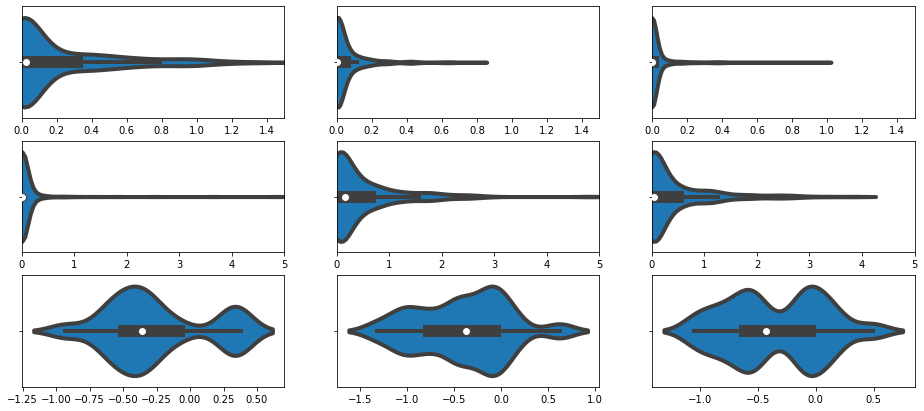

In [42]:
fig, ax = plt.subplots(3, 3, figsize=(16, 7))
ax = ax.flatten()

sns.violinplot(x=merged_data_lwp_dev/1000, ax=ax[0], linewidth=4, inner="box", orient='h', bw=0.3, saturation=1)
sns.violinplot(x=merged_data_lwp_mat/1000, ax=ax[1], linewidth=4, inner="box", orient='h', bw=0.3, saturation=1)
sns.violinplot(x=merged_data_lwp_dec/1000, ax=ax[2], linewidth=4, inner="box", orient='h', bw=0.3, saturation=1)
ax[0].set_xlim(0,1.5)
ax[1].set_xlim(0,1.5)
ax[2].set_xlim(0,1.5)

sns.violinplot(x=merged_data_precip_dev, ax=ax[3], linewidth=4, inner="box", orient='h', bw=0.3, saturation=1)
sns.violinplot(x=merged_data_precip_mat, ax=ax[4], linewidth=4, inner="box", orient='h', bw=0.3, saturation=1)
sns.violinplot(x=merged_data_precip_dec, ax=ax[5], linewidth=4, inner="box", orient='h', bw=0.3, saturation=1)
ax[3].set_xlim(0, 5)
ax[4].set_xlim(0,5)
ax[5].set_xlim(0,5)

sns.violinplot(x=merged_data_temp_anomaly_dev, ax=ax[6], linewidth=4, inner="box", orient='h', bw=0.3, saturation=1)
sns.violinplot(x=merged_data_temp_anomaly_mat, ax=ax[7], linewidth=4, inner="box", orient='h', bw=0.3, saturation=1)
sns.violinplot(x=merged_data_temp_anomaly_dec, ax=ax[8], linewidth=4, inner="box", orient='h', bw=0.3, saturation=1)

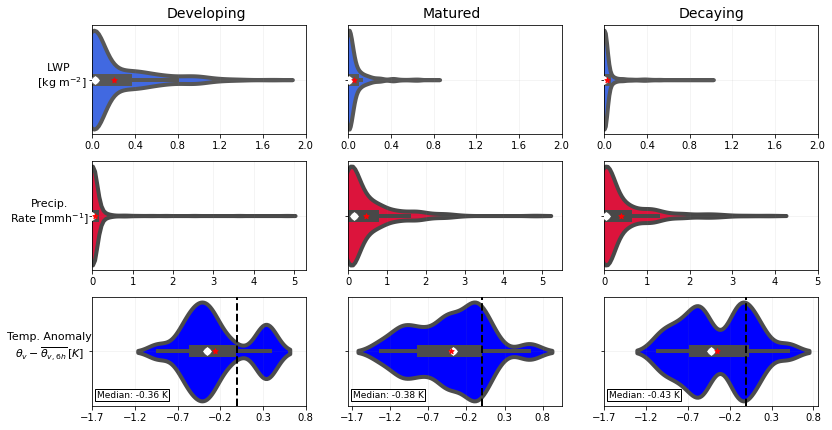

In [110]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(13, 7))
ax = ax.flatten()

# Define datasets for the example
datasets = [ merged_data_lwp_dev/1000, merged_data_lwp_mat/1000, merged_data_lwp_dec/1000,
             merged_data_precip_dev, merged_data_precip_mat, merged_data_precip_dec, 
             merged_data_temp_anomaly_dev, merged_data_temp_anomaly_mat, merged_data_temp_anomaly_dec
           ]

colors = ['royalblue', 'royalblue', 'royalblue','crimson','crimson', 'crimson', 'blue', 'blue', 'blue']
column_labels = ['Developing', 'Matured', 'Decaying']
dev1, mat1, dec1 = np.median(min_values_temp_dev), np.median(min_values_temp_mat), np.median(min_values_temp_dec)                                                                                                                                                                                                                                                    
median_values = [dev1, mat1, dec1]

# Plot the horizontal violin plots with inner boxplots
for i, (data, color) in enumerate(zip(datasets, colors)):
    
    sns.violinplot(x=data, ax=ax[i], color=color, linewidth=4, inner="box", orient='h', bw=0.3, saturation=1)
   
        
#     # Overlay median (box shape) and mean (star shape)
    median = np.median(data)
    mean = np.mean(data)
    ax[i].scatter(median, 0, marker='D', color='white', s=30, zorder=3) # Box shape for median
    ax[i].scatter(mean, 0, marker='*', color='red', s=30, zorder=3) # Star shape for mean
    ax[i].grid(color='gray', alpha=0.1)
    ax[i].set_xlabel("")
    
    
# # Set the quartile, maximum, and minimum lines to red
for i in range(9):
    if ((i == 0) or (i ==1) or (i ==2)):
        ax[i].set_xticks(np.arange(0, 2.2, 0.4))  # Set tick positions at 0, 0.2, 0.4, ..., 2.0
        ax[i].set_xlim(0, ax[i].get_xlim()[1])
    elif ((i == 3) or (i == 4) or (i ==5)):
        ax[i].set_xticks(np.arange(0, 5.2,))
        ax[i].set_xlim(0, ax[i].get_xlim()[1])
    else:
        ax[i].set_xticks(np.arange(-1.7, 1.2, 0.5))
        # ax[i].text(0.35, 1.17, median_values[i], transform=ax[i].transAxes, fontsize=14, va='top')
        # pass
        
    if i == 0:
        ax[i].set_ylabel("LWP \n [kg m$^{-2}$]", fontsize=11, rotation=0)
        ax[i].yaxis.set_label_coords(-0.15, 0.4)  # Adjust the position to shift downward
    if i == 3:
        ax[i].set_ylabel("Precip.\nRate [mmh$^{-1}$]", fontsize=11, rotation=0)
        ax[i].yaxis.set_label_coords(-0.2, 0.4)  # Adjust the position to shift downward
    if i == 6:
        latex_part = r"$\theta_v - \overline{\theta_{v,6h}}\,[K]$"
        anomaly_part = "Temp. Anomaly"
        ax[i].set_ylabel(f"{anomaly_part}\n{latex_part}", fontsize=11, rotation=0)

        ax[i].yaxis.set_label_coords(-0.2, 0.4)  # Adjust the position to shift downward

        
for i in range(3):
    ax[i].text(0.35, 1.17, column_labels[i], transform=ax[i].transAxes, fontsize=14, va='top')
    

for i in range(6, 9):
    ax[i].text(0.02, 0.1, f'Median: {median_values[i - 6]:.2f} K', 
               transform=ax[i].transAxes, fontsize=9, va='center', 
               ha='left', color='black',
               bbox=dict(facecolor='white', edgecolor='black', boxstyle='square,pad=0.15'))
    
       # Add a vertical line at zero for each subplot in the last row
    ax[i].axvline(x=0, color='black', linestyle='--', linewidth=2)
    
# Adjust spacing
fig.subplots_adjust(hspace=0.25)  # Adjust the vertical (height) spacing

# plt.savefig('LWP-PR-Temp-ano-dist.png', dpi=500)  # Save the figure with high DPI

In [106]:
dev, mat, dec = np.mean(min_values_temp_dev), np.mean(min_values_temp_mat), np.mean(min_values_temp_dec)  

In [107]:
dev, mat, dec

(-0.2631778, -0.40297377, -0.34815994)